In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.f2py.crackfortran import kindselector

##### Z-score scaling

In [ ]:
df = pd.DataFrame({
    'h':[150,160,170,180,190],
    'w':[50,60,70,80,90]
})
df

In [ ]:
mean = df.mean()
std = df.std()
z_score = (df-mean)/std
z_score = z_score.round(2)

In [ ]:
z_score.plot(kind='bar')
plt.xlabel('Index')
plt.xlabel('Z-score')
plt.title('Z-scaling features')
plt.show()

##### Min-Max scaling

In [40]:
df = pd.DataFrame({
    'h':[150,175,170,180,190],
    'w':[50,60,70,80,90]
})
df

,h,w
0,150,50
1,175,60
2,170,70
3,180,80
4,190,90


In [43]:
maxi = df.max()
mini = df.min()
min_max = (df - mini)/(maxi - mini)
min_max = min_max.round(2)
min_max

,h,w
0,0.00,0.00
1,0.62,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


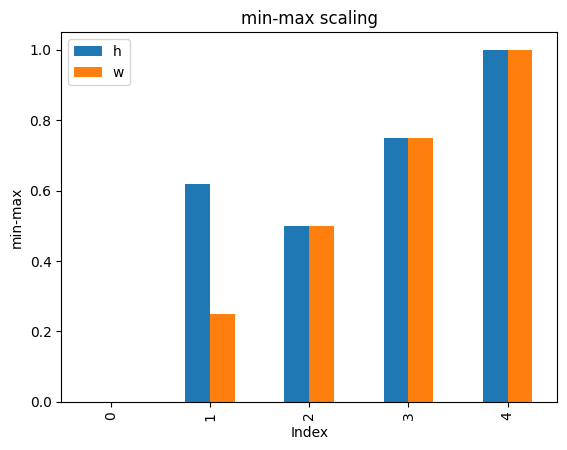

In [45]:
min_max.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('min-max')
plt.title('min-max scaling')
plt.show()

###### Robust scailing

In [60]:
df = pd.DataFrame({
    'h':[150,160,170,180,300],
    'w':[50,60,70,80,200]
})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [61]:
medi = df.median()
q3 = df.quantile(q=0.75)
q1 = df.quantile(q=0.25)
iqr = q3 - q1
robust = (df-medi)/iqr
medi,q3,q1,iqr,robust

(h    170.0
 w     70.0
 dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64,
      h    w
 0 -1.0 -1.0
 1 -0.5 -0.5
 2  0.0  0.0
 3  0.5  0.5
 4  6.5  6.5)

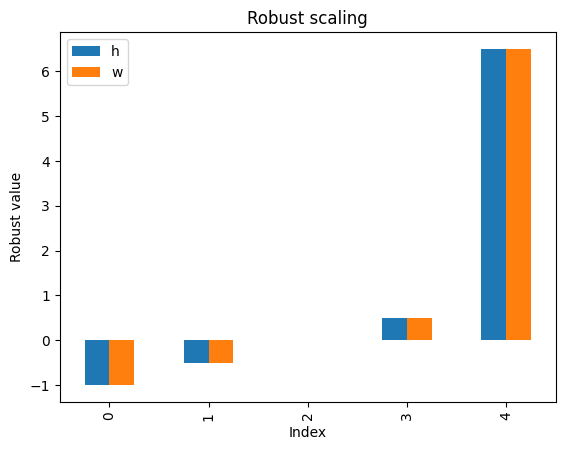

In [62]:
robust.plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Robust value')
plt.title('Robust scaling')
plt.show()

##### One hot encoding

In [87]:
data = {
    'id':[1,2,3,4],
    'color':['red','green','blue','red'],
    'size':['Small','Medium','Large','Medium'],
    'price':[10,12,15,11]
}
df = pd.DataFrame(data)
df

,id,color,size,price
0,1,red,Small,10
1,2,green,Medium,12
2,3,blue,Large,15
3,4,red,Medium,11


In [92]:
d_color = pd.get_dummies(df['color'],prefix='color',dtype=int)
df_encoded = pd.concat([df,d_color],axis=1)
try:
    df_encoded.drop(columns=['color'],inplace=True)
except Exception as ex:
    print(ex)
df_encoded

,id,size,price,color_blue,color_green,color_red
0,1,Small,10,0,0,1
1,2,Medium,12,0,1,0
2,3,Large,15,1,0,0
3,4,Medium,11,0,0,1


##### Ordinal encoding

In [93]:
order = {'Small':1,'Medium':2,'Large':3}
df_encoded['size'] = df_encoded['size'].map(order).astype(int)
df_encoded

,id,size,price,color_blue,color_green,color_red
0,1,1,10,0,0,1
1,2,2,12,0,1,0
2,3,3,15,1,0,0
3,4,2,11,0,0,1


In [94]:
df_encoded.dtypes

id             int64
size           int64
price          int64
color_blue     int64
color_green    int64
color_red      int64
dtype: object